In [1]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2021-11-29 06:53:20--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2021-11-29 06:53:20 (96.6 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [2]:
!unzip "/content/nlp_getting_started.zip" -d "/content/nlp/"

Archive:  /content/nlp_getting_started.zip
  inflating: /content/nlp/sample_submission.csv  
  inflating: /content/nlp/test.csv   
  inflating: /content/nlp/train.csv  


In [3]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler

In [4]:
train_df = pd.read_csv("/content/nlp/train.csv")

In [5]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
train_df.shape

(7613, 5)

In [8]:
train_df = train_df.sample(frac=1, random_state=20)     # shuffle

In [9]:
train_df.head()

,id,keyword,location,text,target
2079,2987,dead,South Stand,@Jones94Kyle now I've said all this he's dead ...,0
3146,4520,emergency,buhh,the new quest type is 'level up quest'. its an...,0
1362,1965,burning%20buildings,seattle grace mercy death,'i never understood guys who wanted to run int...,0
3277,4703,epicentre,"Charlotte, NC",This Friday!!! Club Vault 3rd Floor EpiCentre ...,0
5741,8195,riot,Belgrade,To All The Meat-Loving Feminists Of The World ...,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df['target'], test_size=0.2, random_state=10, stratify=train_df['target'])

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6090,), (6090,), (1523,), (1523,))

In [12]:
VOCAB_SIZE = 10000
EMBED_DIM = 100
MAX_LEN = 30

TRUNC_TYPE = 'post'
PADDING_TYPE = 'post'
OOV_TOKEN = '<OOV>'

In [16]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
vocab_size = len(word_index)

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=MAX_LEN, padding=PADDING_TYPE, truncating=TRUNC_TYPE)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=MAX_LEN, padding=PADDING_TYPE, truncating=TRUNC_TYPE)

In [17]:
training_sequences[:2]

[[1264,
  14,
  1489,
  3041,
  503,
  658,
  2483,
  1082,
  2484,
  3042,
  816,
  151,
  5,
  1025,
  13,
  3981,
  4,
  2,
  3,
  6005],
 [302, 3982, 342, 3983, 3982]]

In [18]:
training_padded[:2]

array([[1264,   14, 1489, 3041,  503,  658, 2483, 1082, 2484, 3042,  816,
         151,    5, 1025,   13, 3981,    4,    2,    3, 6005,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [ 302, 3982,  342, 3983, 3982,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]], dtype=int32)

In [19]:
training_padded = np.array(training_padded)
training_labels = np.array(y_train)

testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

In [26]:
vocab_size

19480

In [27]:
VOCAB_SIZE

10000

In [21]:
# getting Glove

!wget 'http://nlp.stanford.edu/data/glove.6B.zip'

--2021-11-29 07:35:22--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-11-29 07:35:22--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-11-29 07:35:22--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [22]:
!unzip '/content/glove.6B.zip'

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [23]:
import os

embeddings_index = {}
GLOVE_DIR = '/content/'

f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))

for line in f:
    values = line.split()                                             # values have -> word & vector of each word
    word = values[0]                                                  # word have -> getting each word
    coefs = np.asarray(values[1:], dtype='float32')                   # coefs have -> vector of each word
    embeddings_index[word] = coefs                                    # putting coeffs of each word matrix wise
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [24]:
embeddings_index['sandberger']

array([ 0.28365  , -0.6263   , -0.44351  ,  0.2177   , -0.087421 ,
       -0.17062  ,  0.29266  , -0.024899 ,  0.26414  , -0.17023  ,
        0.25817  ,  0.097484 , -0.33103  , -0.43859  ,  0.0095799,
        0.095624 , -0.17777  ,  0.38886  ,  0.27151  ,  0.14742  ,
       -0.43973  , -0.26588  , -0.024271 ,  0.27186  , -0.36761  ,
       -0.24827  , -0.20815  ,  0.22128  , -0.044409 ,  0.021373 ,
        0.24594  ,  0.26143  ,  0.29303  ,  0.13281  ,  0.082232 ,
       -0.12869  ,  0.1622   , -0.22567  , -0.060348 ,  0.28703  ,
        0.11381  ,  0.34839  ,  0.3419   ,  0.36996  , -0.13592  ,
        0.0062694,  0.080317 ,  0.0036251,  0.43093  ,  0.01882  ,
        0.31008  ,  0.16722  ,  0.074112 , -0.37745  ,  0.47363  ,
        0.41284  ,  0.24471  ,  0.075965 , -0.51725  , -0.49481  ,
        0.526    , -0.074645 ,  0.41434  , -0.1956   , -0.16544  ,
       -0.045649 , -0.40153  , -0.13136  , -0.4672   ,  0.18825  ,
        0.2612   ,  0.16854  ,  0.22615  ,  0.62992  , -0.1288

In [25]:
word_index['the']

5

In [28]:
embeddings_matrix = np.zeros((vocab_size+1, EMBED_DIM))               # matrix of 0s of shape (vocab_size+1, EMBED_DIM)

for word, i in word_index.items():                                    # getting word and index of each word from our word_index
    embedding_vector = embeddings_index.get(word)                     # getting embeddings of our words from glove
    if embedding_vector is not None:                                  # if vector of that word is present
        embeddings_matrix[i] = embedding_vector                       # keep it in a matrix

In [29]:
len(embeddings_matrix)                                                # vocab size = 19480, matrix length = 19481

19481

In [30]:
embeddings_matrix[5]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

In [31]:
len(embeddings_matrix[5])

100

In [32]:
embeddings_matrix.shape

(19481, 100)

In [33]:
NUM_CLASSES = 1

In [44]:
model = Sequential([
    layers.Embedding(input_dim=vocab_size+1, output_dim=EMBED_DIM, input_length=MAX_LEN, weights=[embeddings_matrix], trainable=False),
    layers.Dropout(0.2),
    layers.Conv1D(64, 5, activation='relu'),
    layers.MaxPooling1D(pool_size=4),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dropout(0.2),
    layers.Dense(NUM_CLASSES, activation='sigmoid')
])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 100)           1948100   
                                                                 
 dropout_1 (Dropout)         (None, 30, 100)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 64)            32064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 64)            0         
 1D)                                                             
                                                                 
 bidirectional (Bidirectiona  (None, 6, 128)           66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)              

In [46]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.01)
loss        = tf.keras.losses.BinaryCrossentropy()
metrics     = ['accuracy']

In [47]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [48]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=12)
reduce_lr         = ReduceLROnPlateau(monitor='val_loss', patience=8, min_lr=0.001, mode='min', verbose=1, factor=0.1)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [49]:
EPOCHS = 50
CALLBACKS = [early_stopping, reduce_lr, model_checkpoint]

In [50]:
history = model.fit(training_padded,
                    training_labels,
                    validation_data = (testing_padded, testing_labels),
                    verbose = 1,
                    epochs = EPOCHS,
                    callbacks = CALLBACKS)

Epoch 1/50
191/191 [==============================] - 15s 36ms/step - loss: 0.5420 - accuracy: 0.7300 - val_loss: 0.4937 - val_accuracy: 0.7781 - lr: 0.0100
Epoch 2/50
191/191 [==============================] - 5s 27ms/step - loss: 0.4584 - accuracy: 0.7946 - val_loss: 0.4544 - val_accuracy: 0.7951 - lr: 0.0100
Epoch 3/50
191/191 [==============================] - 5s 28ms/step - loss: 0.4295 - accuracy: 0.8161 - val_loss: 0.4652 - val_accuracy: 0.7879 - lr: 0.0100
Epoch 4/50
191/191 [==============================] - 5s 27ms/step - loss: 0.4175 - accuracy: 0.8223 - val_loss: 0.4698 - val_accuracy: 0.8063 - lr: 0.0100
Epoch 5/50
191/191 [==============================] - 5s 27ms/step - loss: 0.4029 - accuracy: 0.8291 - val_loss: 0.4613 - val_accuracy: 0.7978 - lr: 0.0100
Epoch 6/50
191/191 [==============================] - 5s 28ms/step - loss: 0.3760 - accuracy: 0.8414 - val_loss: 0.4541 - val_accuracy: 0.7978 - lr: 0.0100
Epoch 7/50
191/191 [==============================] - 5s 27ms/s

<Figure size 432x288 with 0 Axes>

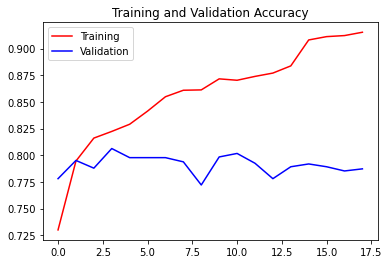

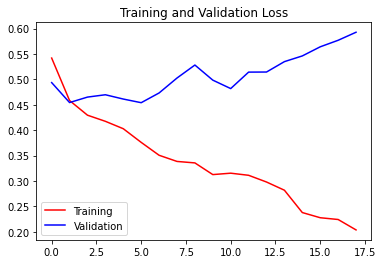

<Figure size 432x288 with 0 Axes>

In [74]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [61]:
y_pred = model.predict(testing_padded)

In [68]:
y_pred[:10]

array([[0.9995503 ],
       [0.29526624],
       [0.3775412 ],
       [0.01262945],
       [0.99658656],
       [0.01298267],
       [0.01915234],
       [0.9977976 ],
       [0.2927453 ],
       [0.14660385]], dtype=float32)

In [64]:
y_pred_upd = []

for i in y_pred:
    if i[0]<0.50:
        y_pred_upd.append(0)
    else:
        y_pred_upd.append(1)

In [69]:
y_pred_upd[:10]

[1, 0, 0, 0, 1, 0, 0, 1, 0, 0]

In [73]:
values, counts = np.unique(y_test, return_counts=True)
values, counts

(array([0, 1]), array([869, 654]))

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_upd))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       869
           1       0.79      0.69      0.74       654

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



In [67]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_upd)

array([[747, 122],
       [202, 452]])